In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

In [2]:
data = pd.read_csv('accepted_2007_to_2018Q4.csv')

C:\Users\mehul\AppData\Local\Temp\ipykernel_8892\2567533633.py:1: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('accepted_2007_to_2018Q4.csv')


In [3]:
data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260696,88985880,NaN,40000.0,40000.0,40000.0,60 months,10.49,859.56,B,B3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2260697,88224441,NaN,24000.0,24000.0,24000.0,60 months,14.49,564.56,C,C4,...,NaN,NaN,Cash,Y,Mar-2019,ACTIVE,Mar-2019,10000.0,44.82,1.0
2260698,88215728,NaN,14000.0,14000.0,14000.0,60 months,14.49,329.33,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2260699,Total amount funded in policy code 1: 1465324575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Cutting the data in half to avoid out-of-memory issues

data = data.sample(frac=0.5, axis=0, random_state=42).reset_index(drop=True)

In [5]:
data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,39651438,NaN,32000.0,32000.0,32000.0,60 months,10.49,687.65,B,B3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,16411620,NaN,9600.0,9600.0,9600.0,36 months,12.99,323.42,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,45122316,NaN,4000.0,4000.0,4000.0,36 months,6.68,122.93,A,A3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,125356772,NaN,6025.0,6025.0,6025.0,36 months,10.91,197.00,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,128490686,NaN,25000.0,25000.0,25000.0,60 months,26.30,752.96,E,E5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130345,8581088,NaN,12000.0,12000.0,12000.0,60 months,15.61,289.34,C,C3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1130346,5646193,NaN,19750.0,19750.0,19750.0,36 months,17.27,706.80,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1130347,9294954,NaN,11325.0,11325.0,11325.0,60 months,18.55,290.98,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1130348,59249382,NaN,5450.0,5450.0,5450.0,36 months,14.65,188.00,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.isna().mean().sort_values()

id                                            0.000000
fico_range_high                               0.000017
hardship_flag                                 0.000017
revol_bal                                     0.000017
initial_list_status                           0.000017
                                                ...   
hardship_reason                               0.995193
hardship_dpd                                  0.995193
hardship_loan_status                          0.995193
orig_projected_additional_accrued_interest    0.996196
member_id                                     1.000000
Length: 151, dtype: float64

In [7]:
data = data.drop(data.loc[:, data.isna().mean().sort_values() > 0.3].columns, axis=1)

In [8]:
data = data.dropna(axis=0).reset_index(drop=True)

In [9]:
data.isna().sum().sum()

0

In [10]:
unneeded_columns = ['id', 'sub_grade', 'emp_title', 'url', 'title', 'zip_code']

In [11]:
{column: list(data[column].unique()) for column in data.drop(unneeded_columns, axis=1).columns if data.dtypes[column] == 'object'}

{'term': [' 60 months', ' 36 months'],
 'grade': ['B', 'E', 'C', 'A', 'D', 'F', 'G'],
 'emp_length': ['10+ years',
  '5 years',
  '7 years',
  '2 years',
  '1 year',
  '< 1 year',
  '4 years',
  '6 years',
  '3 years',
  '9 years',
  '8 years'],
 'home_ownership': ['MORTGAGE', 'RENT', 'OWN', 'ANY', 'NONE', 'OTHER'],
 'verification_status': ['Verified', 'Not Verified', 'Source Verified'],
 'issue_d': ['Feb-2015',
  'Dec-2017',
  'Feb-2018',
  'Aug-2016',
  'Oct-2016',
  'Jan-2018',
  'Jan-2015',
  'Sep-2014',
  'May-2015',
  'Apr-2016',
  'Sep-2016',
  'Oct-2017',
  'Jun-2015',
  'Jun-2013',
  'Oct-2013',
  'Jul-2017',
  'May-2018',
  'Jan-2013',
  'Jan-2017',
  'Nov-2018',
  'Jul-2014',
  'Sep-2018',
  'Aug-2017',
  'Oct-2015',
  'Jul-2016',
  'Aug-2018',
  'Aug-2015',
  'Sep-2015',
  'Feb-2017',
  'Mar-2017',
  'Mar-2018',
  'Nov-2014',
  'Mar-2013',
  'Oct-2014',
  'Apr-2015',
  'Feb-2014',
  'Nov-2017',
  'Apr-2013',
  'May-2013',
  'Mar-2014',
  'Jul-2018',
  'Dec-2016',
  'Jul-201

In [12]:
data = data.drop(unneeded_columns, axis=1)

In [13]:
date_columns = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d']

In [14]:
for column in date_columns:
    data[column + '_month'] = data[column].apply(lambda x: x[0:3])
    data[column + '_year'] = data[column].apply(lambda x: x[-4:])

In [15]:
data = data.drop(date_columns, axis=1)

In [16]:
month_ordering = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [17]:
for column in date_columns:
    data[column + '_month'] = data[column + '_month'].apply(lambda x: month_ordering.index(x))

In [19]:
for column in data.columns:
    try:
        data[column] = data[column].astype(np.float)
    except:
        pass

C:\Users\mehul\AppData\Local\Temp\ipykernel_8892\140770359.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data[column] = data[column].astype(np.float)


In [20]:
{column: list(data[column].unique()) for column in data.columns if data.dtypes[column] == 'object'}

{'term': [' 60 months', ' 36 months'],
 'grade': ['B', 'E', 'C', 'A', 'D', 'F', 'G'],
 'emp_length': ['10+ years',
  '5 years',
  '7 years',
  '2 years',
  '1 year',
  '< 1 year',
  '4 years',
  '6 years',
  '3 years',
  '9 years',
  '8 years'],
 'home_ownership': ['MORTGAGE', 'RENT', 'OWN', 'ANY', 'NONE', 'OTHER'],
 'verification_status': ['Verified', 'Not Verified', 'Source Verified'],
 'loan_status': ['Current',
  'Fully Paid',
  'Charged Off',
  'Late (31-120 days)',
  'Late (16-30 days)',
  'In Grace Period',
  'Default'],
 'pymnt_plan': ['n', 'y'],
 'purpose': ['debt_consolidation',
  'credit_card',
  'house',
  'small_business',
  'major_purchase',
  'home_improvement',
  'other',
  'medical',
  'car',
  'renewable_energy',
  'moving',
  'vacation',
  'wedding',
  'educational'],
 'addr_state': ['CA',
  'MA',
  'NV',
  'OH',
  'FL',
  'MI',
  'IN',
  'ID',
  'PA',
  'TX',
  'OR',
  'NY',
  'GA',
  'VA',
  'TN',
  'AL',
  'MD',
  'KY',
  'MN',
  'CO',
  'WY',
  'LA',
  'NJ',
  'A

In [21]:
target = 'grade'


binary_features = ['term', 'pymnt_plan', 'initial_list_status', 'application_type', 'hardship_flag', 'disbursement_method', 'debt_settlement_flag']
binary_positives = [' 60 months', 'y', 'w', 'Individual', 'Y', 'Cash', 'Y']

ordinal_features = ['emp_length']
emp_ordering = [
    '< 1 year',
    '1 year',
    '2 years',
    '3 years',
    '4 years',
    '5 years',
    '6 years',
    '7 years',
    '8 years',
    '9 years',
    '10+ years'
]

nominal_features = ['home_ownership', 'verification_status', 'loan_status', 'purpose', 'addr_state']

In [22]:
# Encoding functions

def binary_encode(df, column, positive_value):
    df[column] = df[column].apply(lambda x: 1 if x == positive_value else 0)

def ordinal_encode(df, column, ordering):
    df[column] = df[column].apply(lambda x: ordering.index(x))

def onehot_encode(df, column):
    dummies = pd.get_dummies(df[column])
    df_new = pd.concat([df, dummies], axis=1)
    df_new = df_new.drop(column, axis=1)
    return df_new

In [23]:
# Perform encoding

for feature, positive_value in zip(binary_features, binary_positives):
    binary_encode(data, feature, positive_value)

ordinal_encode(data, 'emp_length', emp_ordering)

for feature in nominal_features:
    data = onehot_encode(data, feature)

In [24]:
# Encoding label column

label_encoder = LabelEncoder()

data[target] = label_encoder.fit_transform(data[target])

target_mappings = {index: label for index, label in enumerate(label_encoder.classes_)}
target_mappings

{0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G'}

In [25]:
y = data['grade']
X = data.drop('grade', axis=1)

In [26]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [28]:
inputs = tf.keras.Input(shape=(166,))
x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(7, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)


model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


batch_size = 32
epochs = 20

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[tf.keras.callbacks.ReduceLROnPlateau()]
)

Epoch 1/20
14465/14465 [==============================] - 18s 1ms/step - loss: 0.2696 - accuracy: 0.8908 - val_loss: 0.1710 - val_accuracy: 0.9287 - lr: 0.0010
Epoch 2/20
14465/14465 [==============================] - 16s 1ms/step - loss: 0.1449 - accuracy: 0.9412 - val_loss: 0.1280 - val_accuracy: 0.9466 - lr: 0.0010
Epoch 3/20
14465/14465 [==============================] - 16s 1ms/step - loss: 0.1137 - accuracy: 0.9537 - val_loss: 0.0994 - val_accuracy: 0.9594 - lr: 0.0010
Epoch 4/20
14465/14465 [==============================] - 16s 1ms/step - loss: 0.0963 - accuracy: 0.9602 - val_loss: 0.0918 - val_accuracy: 0.9621 - lr: 0.0010
Epoch 5/20
14465/14465 [==============================] - 16s 1ms/step - loss: 0.0861 - accuracy: 0.9646 - val_loss: 0.0815 - val_accuracy: 0.9676 - lr: 0.0010
Epoch 6/20
14465/14465 [==============================] - 18s 1ms/step - loss: 0.0776 - accuracy: 0.9686 - val_loss: 0.0754 - val_accuracy: 0.9699 - lr: 0.0010
Epoch 7/20
14465/14465 [================

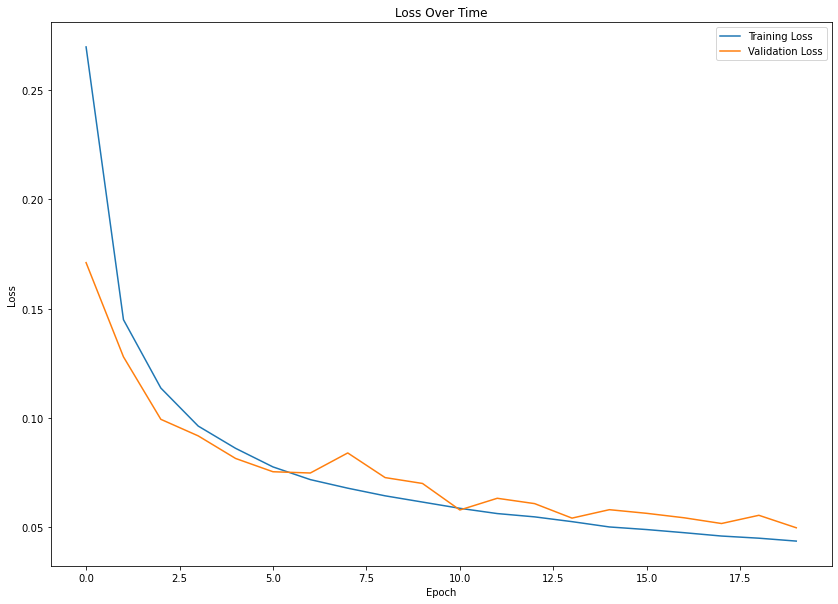

In [29]:
plt.figure(figsize=(14, 10))

epochs_range = range(epochs)
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs_range, train_loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Over Time")
plt.legend()

plt.show()

In [30]:
model.evaluate(X_test, y_test)

7749/7749 [==============================] - 6s 784us/step - loss: 0.0505 - accuracy: 0.9816


[0.05045120418071747, 0.9816380739212036]